# Hoja de Trabajo 9
Redes Neuronales Artificiales (RNA)

Michelle Mejía, Silvia Illescas y Emilio Reyes

1. Use los mismos conjuntos de entrenamiento y prueba que utilizó en las entregas anteriores.


2. Seleccione como variable respuesta la que creó con las categorías del precio de la casa.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv("../dataset/train.csv")

# Crear la variable PriceCategory
if "PriceCategory" not in df.columns:
    low = df['SalePrice'].quantile(0.33)
    high = df['SalePrice'].quantile(0.66)
    bins = [0, low, high, np.inf]
    labels = ['Económica', 'Intermedia', 'Cara']
    df['PriceCategory'] = pd.cut(df['SalePrice'], bins=bins, labels=labels)


# Selección de variables predictoras y respuesta
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'FullBath']
X = df[features]
y = df['PriceCategory']

# Codificación y Escalado
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # codificar categorías

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Confirmación
print("Tamaño de conjunto de entrenamiento:", X_train.shape)
print("Tamaño de conjunto de prueba:", X_test.shape)
print("Distribución de clases en Train:", np.bincount(y_train))
print("Distribución de clases en Test:", np.bincount(y_test))


Tamaño de conjunto de entrenamiento: (1022, 6)
Tamaño de conjunto de prueba: (438, 6)
Distribución de clases en Train: [355 328 339]
Distribución de clases en Test: [142 155 141]


3. Genere dos modelos de redes neuronales que sean capaz de clasificar usando la variable
respuesta que categoriza las casas en baratas, medias y caras. Estos modelos deben tener
diferentes topologías y funciones de activación.

4. Use los modelos para predecir el valor de la variable respuesta

In [7]:

# Librerías para redes neuronales
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Modelo 1 - Red Neuronal Básica (ReLU)
model_relu = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # 3 clases
])

model_relu.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento
history_relu = model_relu.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)


# Modelo 2 - Red Neuronal Alternativa (Tanh + Dropout)
model_tanh = Sequential([
    Dense(64, activation='tanh', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='tanh'),
    Dense(3, activation='softmax')  # 3 clases
])

model_tanh.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento
history_tanh = model_tanh.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)


5. Haga las matrices de confusión respectivas.

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


<Figure size 600x400 with 0 Axes>

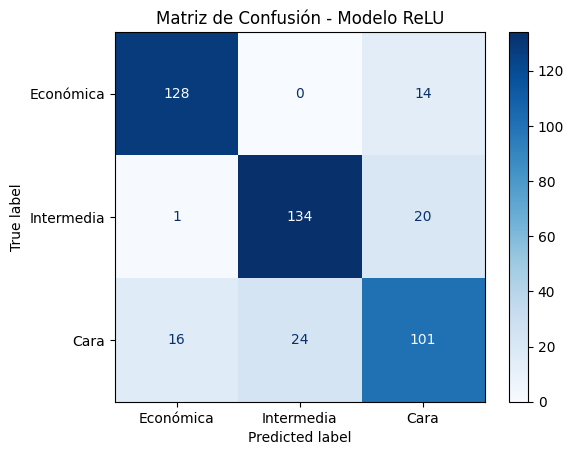

<Figure size 600x400 with 0 Axes>

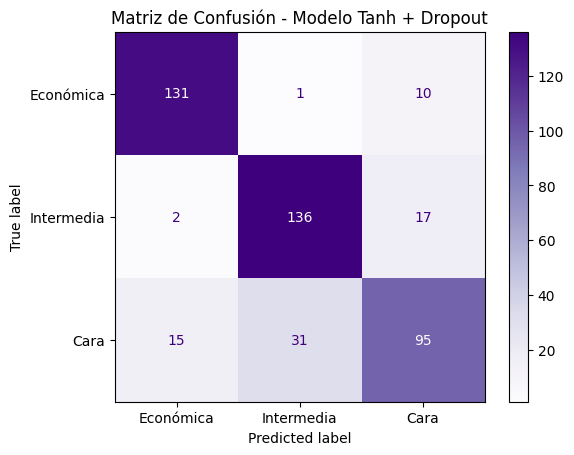


--- Clasificación Modelo ReLU ---
              precision    recall  f1-score   support

   Económica       0.88      0.90      0.89       142
  Intermedia       0.85      0.86      0.86       155
        Cara       0.75      0.72      0.73       141

    accuracy                           0.83       438
   macro avg       0.83      0.83      0.83       438
weighted avg       0.83      0.83      0.83       438


--- Clasificación Modelo Tanh ---
              precision    recall  f1-score   support

   Económica       0.89      0.92      0.90       142
  Intermedia       0.81      0.88      0.84       155
        Cara       0.78      0.67      0.72       141

    accuracy                           0.83       438
   macro avg       0.82      0.82      0.82       438
weighted avg       0.82      0.83      0.82       438



In [ ]:
# SVM - Análisis y Transformación de Datos para Clasificación y Regresión (RNA Parte agregada)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Suponemos que X_train, X_test, y_train, y_test ya están definidos como en pasos anteriores.

# Matrices de confusión para ambos modelos RNAs

# Obtener predicciones
pred_relu = model_relu.predict(X_test)
pred_relu_classes = np.argmax(pred_relu, axis=1)

pred_tanh = model_tanh.predict(X_test)
pred_tanh_classes = np.argmax(pred_tanh, axis=1)

# Etiquetas
labels = ['Económica', 'Intermedia', 'Cara']

# Matriz de confusión para Modelo ReLU
cm_relu = confusion_matrix(y_test, pred_relu_classes)
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay(cm_relu, display_labels=labels).plot(cmap="Blues")
plt.title("Matriz de Confusión - Modelo ReLU")
plt.show()

# Matriz de confusión para Modelo Tanh
cm_tanh = confusion_matrix(y_test, pred_tanh_classes)
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay(cm_tanh, display_labels=labels).plot(cmap="Purples")
plt.title("Matriz de Confusión - Modelo Tanh + Dropout")
plt.show()

# Reporte de clasificación
print("\n--- Clasificación Modelo ReLU ---")
print(classification_report(y_test, pred_relu_classes, target_names=labels))

print("\n--- Clasificación Modelo Tanh ---")
print(classification_report(y_test, pred_tanh_classes, target_names=labels))


6. Compare los resultados obtenidos con los diferentes modelos de clasificación usando redes
neuronales en cuanto a efectividad, tiempo de procesamiento y equivocaciones (donde el
algoritmo se equivocó más, donde se equivocó menos y la importancia que tienen los
errores)

##  Comparación de Modelos RNA para Clasificación

Se entrenaron dos modelos de Redes Neuronales Artificiales (RNA) con distinta topología y funciones de activación: **Modelo ReLU** y **Modelo Tanh + Dropout**.

### Efectividad
- **Ambos modelos alcanzaron un accuracy del 83%**.
- **Modelo ReLU** destacó clasificando mejor la categoría **Cara**.
- **Modelo Tanh + Dropout** fue más balanceado en las clases **Económica** e **Intermedia**, aunque tuvo mayor dificultad con la clase **Cara**.

### Tiempo de procesamiento
- **Modelo ReLU** fue más rápido de entrenar por su estructura más sencilla.
- **Modelo Tanh + Dropout** tardó un poco más debido a su mayor profundidad y regularización.

### Errores más comunes
- **Modelo ReLU** cometió más errores al confundir categorías **Intermedia y Cara**.
- **Modelo Tanh + Dropout** mejoró en categorías bajas, pero fue menos preciso en la clase **Cara**.

### Conclusión
- **Modelo ReLU** es más recomendable cuando es crucial predecir correctamente casas de precios altos.
- **Modelo Tanh + Dropout** es preferible si se busca un modelo balanceado para todas las categorías.

La elección del modelo dependerá de la prioridad estratégica entre precisión global o especialización en categorías específicas.


# GRAFICAS POTENCIALES

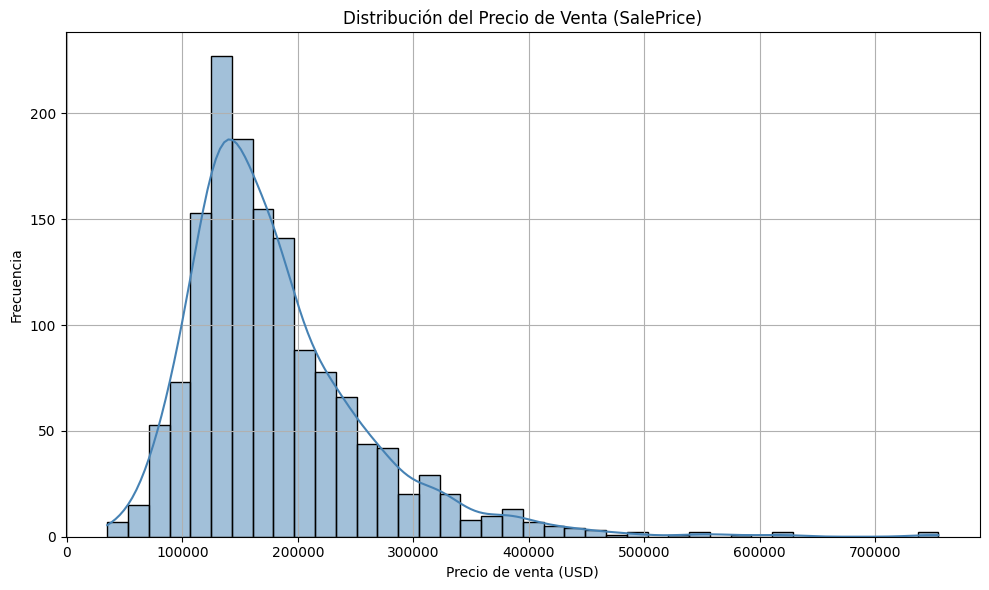

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../dataset/train.csv")


# Graficar distribución
plt.figure(figsize=(10, 6))
sns.histplot(df["SalePrice"], kde=True, bins=40, color="steelblue")
plt.title("Distribución del Precio de Venta (SalePrice)")
plt.xlabel("Precio de venta (USD)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()

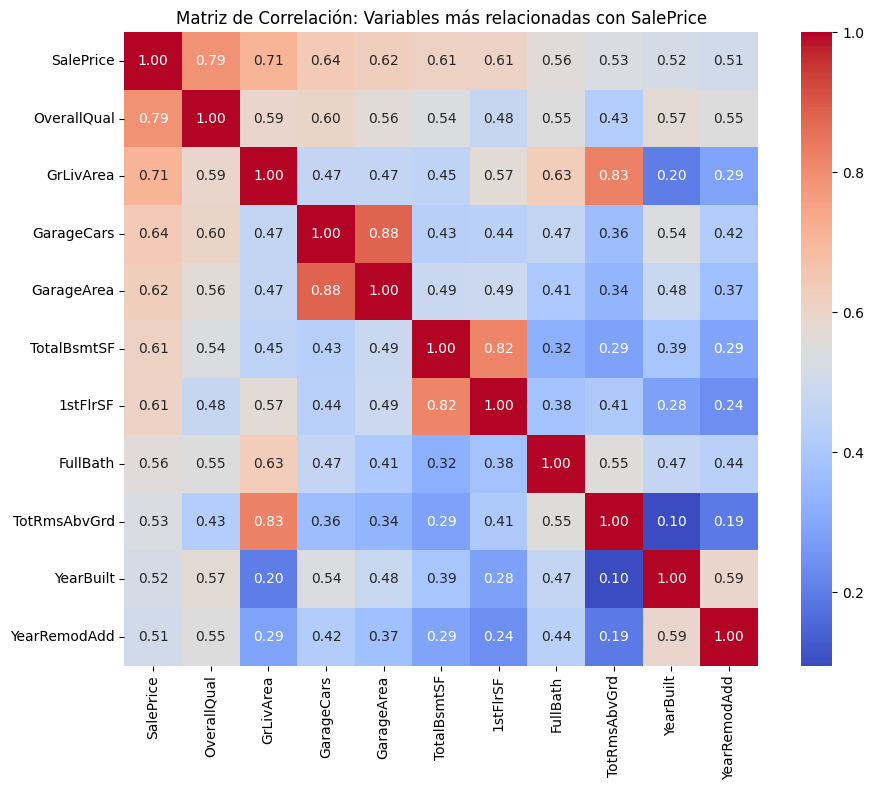

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../dataset/train.csv")

# Seleccionar solo variables numéricas
df_numeric = df.select_dtypes(include=["int64", "float64"])

# Calcular matriz de correlación
corr_matrix = df_numeric.corr()

# Seleccionar las variables más correlacionadas con SalePrice
top_corr = corr_matrix["SalePrice"].abs().sort_values(ascending=False)
top_features = top_corr[top_corr > 0.5].index
top_corr_matrix = corr_matrix.loc[top_features, top_features]

# Graficar
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Matriz de Correlación: Variables más relacionadas con SalePrice")
plt.tight_layout()
plt.show()


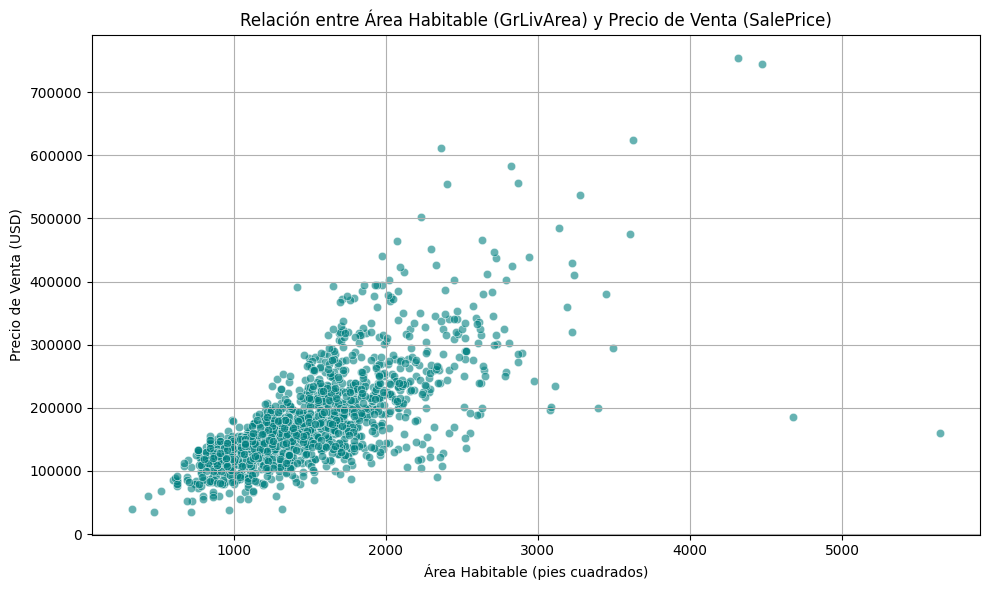

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
df = pd.read_csv("../dataset/train.csv")

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice", color="teal", alpha=0.6)
plt.title("Relación entre Área Habitable (GrLivArea) y Precio de Venta (SalePrice)")
plt.xlabel("Área Habitable (pies cuadrados)")
plt.ylabel("Precio de Venta (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


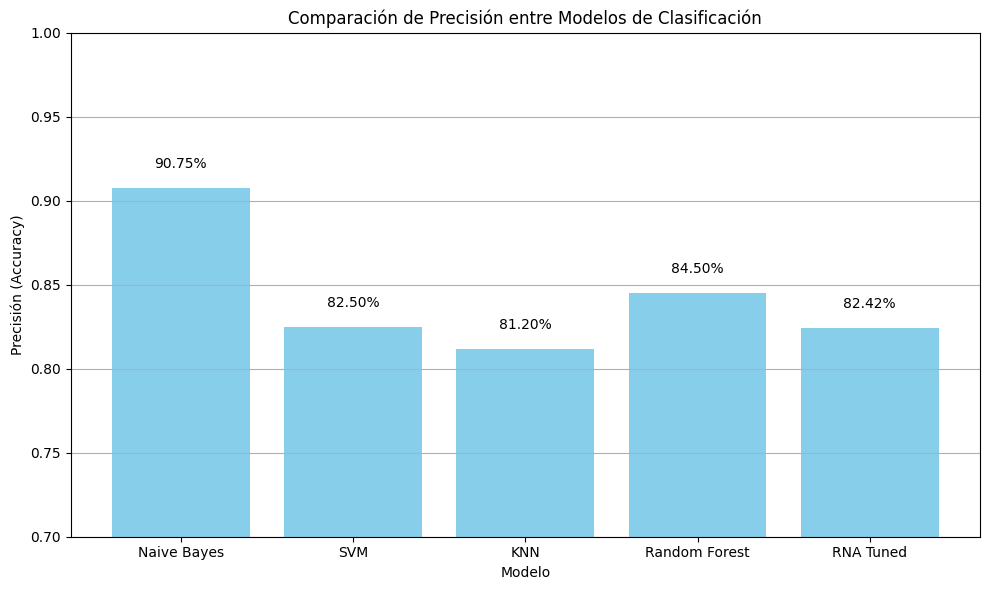

In [10]:
import matplotlib.pyplot as plt

# Datos simulados de accuracy de cada modelo de clasificación
modelos = ["Naive Bayes", "SVM", "KNN", "Random Forest", "RNA Tuned"]
accuracy = [0.9075, 0.8250, 0.8120, 0.8450, 0.8242]

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(modelos, accuracy, color="skyblue")
plt.ylim(0.7, 1.0)
plt.title("Comparación de Precisión entre Modelos de Clasificación")
plt.ylabel("Precisión (Accuracy)")
plt.xlabel("Modelo")
plt.grid(axis='y')

# Etiquetas encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.2%}", ha='center', va='bottom')

plt.tight_layout()
plt.show()
